In [ ]:
import sys
import os
import sympy as sp
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..')))
import setup_paths

from gauss_fehlerfortpflanzung import evaluate_gaussian_error
from gauss_fehlerfortpflanzung import gaussian_error_propagation
from geraden_fit import geraden_fit
from scientific_error_rounder import runden_und_speichern
from mean_calc_w_err import err_weighted_mean
from tabelle import tabellen_ersteller
from geraden_fit_config import config_1

In [47]:
err_weighted_mean('offset')

(1.3, 0.0118)

***Teil a (Jannis' Werk - sehr verlässlich)***

In [45]:
var_names=[T, U1, U2, U3, U4, T0, U0]=sp.symbols('T U1 U2 U3 U4 T0 U0')
formula_list=[
    (T**4- T0**4)*10**(-8),
    (U1-U0)/3,
    (U2-U0)/3,
    (U3-U0)/3,
    (U4-U0)/3,
    ]
evaluate_gaussian_error('b_daten_korrigiert.txt',formulas=formula_list, variables=var_names, result_length=2,result_names=['T^4-T0^4 [10^8*K^4]', 'Phi/A_sp[W/m^2]', 'Phi/A_ma[W/m^2]', 'Phi/A_we[W/m^2]', 'Phi/A_sw[W/m^2]'])

sqrt((4.0e-8*T**3*del_T)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (-4.0e-8*T0**3*del_T0)**2 + (0)**2)
sqrt((0)**2 + (del_U1/3)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2 + (-del_U0/3)**2)
sqrt((0)**2 + (0)**2 + (del_U2/3)**2 + (0)**2 + (0)**2 + (0)**2 + (-del_U0/3)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_U3/3)**2 + (0)**2 + (0)**2 + (-del_U0/3)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_U4/3)**2 + (0)**2 + (-del_U0/3)**2)
Zeile 1: [1.05, 0.74, -0.0, 0.03, -0.0, 0.03, 1.0, 0.03, 0.97, 0.03]
Zeile 2: [6.48, 0.76, 0.17, 0.03, 0.4, 0.03, 2.63, 0.03, 2.53, 0.03]
Zeile 3: [12.18, 0.78, 0.27, 0.03, 0.7, 0.03, 4.33, 0.03, 4.2, 0.03]
Zeile 4: [18.17, 0.81, 0.5, 0.03, 1.03, 0.03, 6.07, 0.03, 6.03, 0.03]
Zeile 5: [31.04, 0.85, 0.9, 0.03, 1.87, 0.03, 9.67, 0.03, 9.57, 0.03]
Zeile 6: [37.93, 0.88, 1.33, 0.03, 2.33, 0.03, 12.23, 0.03, 12.03, 0.03]
Zeile 7: [45.16, 0.91, 1.73, 0.03, 2.73, 0.03, 14.3, 0.03, 13.93, 0.03]
Zeile 8: [60.6, 0.96, 2.17, 0.03, 3.83, 0.03, 18.63, 0.03, 18.7, 0.03]
Zeile 9

0.03931867121100647 0.03892612314781365
Fit-Ergebnisse für Spiegelnd:
Schwerpunkt: (34.5 ± 0.9, 1.20 ± 0.03)
Steigung: 0.0391 ± 0.0005
Y-Achsenabschnitt: -0.149 ± 0.022

0.06320544661182308 0.06311544467003352
Fit-Ergebnisse für Matt:
Schwerpunkt: (33.2 ± 0.9, 2.03 ± 0.03)
Steigung: 0.0631 ± 0.0007
Y-Achsenabschnitt: -0.07 ± 0.03

0.2915491890845779 0.2924356695632672
Fit-Ergebnisse für Weiß:
Schwerpunkt: (31.8 ± 0.9, 10.09 ± 0.03)
Steigung: 0.292 ± 0.003
Y-Achsenabschnitt: 0.79 ± 0.12

0.2917390344554283 0.29234170796563447
Fit-Ergebnisse für Schwarz:
Schwerpunkt: (31.8 ± 0.9, 9.99 ± 0.03)
Steigung: 0.292 ± 0.003
Y-Achsenabschnitt: 0.69 ± 0.12



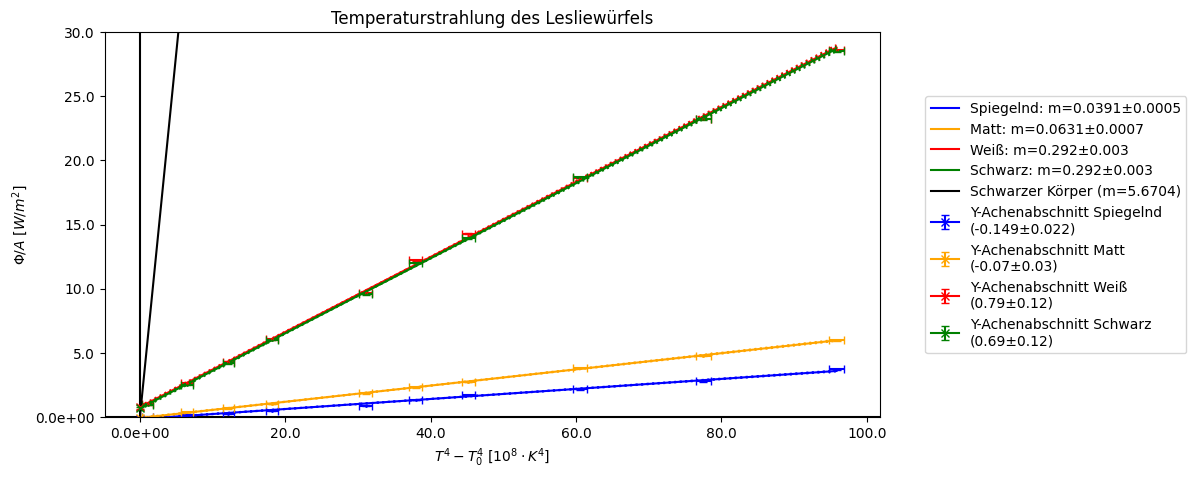

In [46]:
geraden_fit('b_daten_korrigiert_results.csv', title = 'Temperaturstrahlung des Lesliewürfels',
             x_label = r'$T^4-T_0^4 ~ [10^8 \cdot K^4]$', y_label = r'$\Phi/A ~ [W/m^2]$', 
                save = True, y_colors = ['blue', 'orange', 'red', 'green'],
                focus_point = False, y_labels = ['Spiegelnd', 'Matt', 'Weiß', 'Schwarz'], plot_x_inter = False, plot_errors=True, plot_y_inter=True,
                Ursprungsgerade = 5.6704, y_max = 30, y_min = 0, legendlocation = 'outside right', Ursprungsgerade_title = 'Schwarzer Körper'
            )

In [6]:
# Spiegelnd:
var_names=[m, sigma]=sp.symbols('m sigma')
formula=m/sigma
gaussian_error_propagation(formula, ((m,0.0391e-8,0.0005e-8),(sigma,5.670374e-8,0)))

Formel: m/sigma
Werte: ((m, 3.91e-10, 5e-12), (sigma, 5.670374e-08, 0)) 

Formelwert: 0.00689548872790402

Fehlerformel: sqrt((del_m/sigma)**2)
Fehler: 0.0000881776052161639 
Ergebnis: 0.0069±9e-05
Das Ergebnis hat eine Genauigkeit von 1.304%


In [11]:
# Matt:
var_names=[m, sigma]=sp.symbols('m sigma')
formula=m/sigma
gaussian_error_propagation(formula, ((m,0.0631e-8,0.0005e-8),(sigma,5.670374e-8,0)))

Formel: m/sigma
Werte: ((m, 6.31e-10, 5e-12), (sigma, 5.670374e-08, 0)) 

Formelwert: 0.0111280137782799

Fehlerformel: sqrt((del_m/sigma)**2)
Fehler: 0.0000881776052161639 
Ergebnis: 0.01113±9e-05
Das Ergebnis hat eine Genauigkeit von 0.809%


In [13]:
# Schwarz/Weiß:
var_names=[m, sigma]=sp.symbols('m sigma')
formula=m/sigma
gaussian_error_propagation(formula, ((m,0.292e-8,0.003e-8),(sigma,5.670374e-8,0)))

Formel: m/sigma
Werte: ((m, 2.92e-09, 3e-11), (sigma, 5.670374e-08, 0)) 

Formelwert: 0.0514957214462397

Fehlerformel: sqrt((del_m/sigma)**2)
Fehler: 0.000529065631296983 
Ergebnis: 0.0515±0.0005
Das Ergebnis hat eine Genauigkeit von 0.971%


***Ab hier beginnt Teil c (von Dejan erstellt, nicht trauen!)***  
  
*Aufgabenteil 1:*

In [38]:
runden_und_speichern('c1_daten')
runden_und_speichern('c2_daten')

Die gerundeten Daten wurden in der Datei "c1_daten_rounded" gespeichert.
Die gerundeten Daten wurden in der Datei "c2_daten_rounded" gespeichert.


In [39]:
S=30e-6
var_names=[d, U, U0]=sp.symbols('d U U0')
formula_list=[
	1/d**3,
    (U-U0)/(100*S),
    ]
evaluate_gaussian_error('c1_daten_rounded',formulas=formula_list, variables=var_names, result_length=5,
result_names=['d**3 [cm**3]', 'Phi/A [W]'], output_file_suffix='leistung_var')

sqrt((-3*del_d/d**4)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (333.333333333333*del_U)**2 + (-333.333333333333*del_U0)**2)
Zeile 1: [0.00024, 5e-05, 544.33333, 0.33375]
Zeile 2: [0.00013, 2e-05, 323.0, 0.33375]
Zeile 3: [6e-05, 1e-05, 174.66667, 0.33375]
Zeile 4: [4e-05, 0.0, 97.66667, 0.33375]
Zeile 5: [2e-05, 0.0, 60.0, 0.33375]
Zeile 6: [2e-05, 0.0, 40.0, 0.33375]
Zeile 7: [1e-05, 0.0, 21.33333, 0.33375]
Auswertung abgeschlossen. Ergebnisse wurden in 'c1_daten_rounded_leistung_var.csv' gespeichert.


2276684.8076923084 nan


c:\Users\Dejan\Desktop\Uni\3. Semester\P2\data-analasys-plotting-tool\P3\geraden_fit.py:82: RuntimeWarning: divide by zero encountered in divide
  weights = np.square(1 / err_input)
c:\Users\Dejan\Desktop\Uni\3. Semester\P2\data-analasys-plotting-tool\P3\geraden_fit.py:85: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(z_input * weights) / np.sum(weights)


ValueError: cannot convert NaN to integer

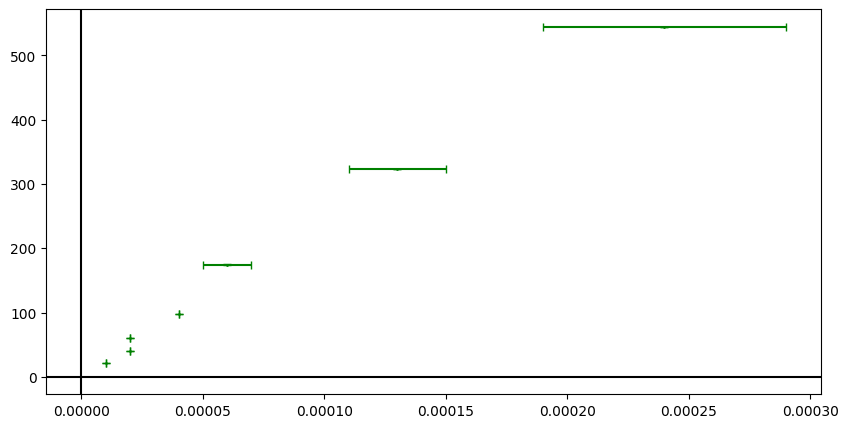

In [40]:
geraden_fit('c1_daten_rounded_leistung_var.csv', title = 'Abstandszusammenhang der gemessenen Strahlungsleistung',
             x_label = r'$d^{-3} ~ [cm^{-3}]$', y_label = r'$\Phi/A ~ [W/m^2]$', 
                save = True, y_colors = ['green'], y_decimal_places=0,
                focus_point = True, y_labels = ['Ausgleichsgerade'], plot_x_inter = False, plot_errors=True, plot_y_inter=True,
                y_max = 540, y_min = 0, legendlocation = 'lower right'
            )

*Aufgabeteil 2:*

In [41]:
alpha, beta =4.28e-3, 6.67e-7

var_names=[U_Nt, I_Nt, U_MM, T, R_0, U0]=sp.symbols('U_Nt I_Nt U_MM T R_0 U0')
formula_list=[
	T,
	R_0,
	U_Nt/I_Nt,
    (U_MM-U0)/(100*S)
    ]
evaluate_gaussian_error('c2_daten_rounded',formulas=formula_list, variables=var_names, result_length=5,
result_names=['T_0[K]', 'R_0[Ohm]', 'R[Ohm]','Phi/A [W]'], output_file_suffix='zwischen')

sqrt((0)**2 + (0)**2 + (0)**2 + (del_T)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (0)**2 + (del_R_0)**2 + (0)**2)
sqrt((del_U_Nt/I_Nt)**2 + (-U_Nt*del_I_Nt/I_Nt**2)**2 + (0)**2 + (0)**2 + (0)**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (333.333333333333*del_U_MM)**2 + (0)**2 + (0)**2 + (-333.333333333333*del_U0)**2)
Zeile 1: [297.2, 2.0, 0.55, 0.05, 2.85714, 0.02363, 534.73333, 1.66675]
Zeile 2: [297.2, 2.0, 0.55, 0.05, 2.75, 0.02412, 472.4, 1.66675]
Zeile 3: [297.2, 2.0, 0.55, 0.05, 2.58667, 0.02462, 389.4, 1.66675]
Zeile 4: [297.2, 2.0, 0.55, 0.05, 2.48571, 0.02565, 340.73333, 1.66675]
Zeile 5: [297.2, 2.0, 0.55, 0.05, 2.2, 0.0276, 226.06667, 1.66675]
Zeile 6: [297.2, 2.0, 0.55, 0.05, 1.92, 0.03051, 143.73333, 1.66675]
Zeile 7: [297.2, 2.0, 0.55, 0.05, 1.65, 0.03518, 77.4, 1.66675]
Zeile 8: [297.2, 2.0, 0.55, 0.05, 1.26667, 0.04187, 33.06667, 1.66675]
Zeile 9: [297.2, 2.0, 0.55, 0.05, 0.7, 0.05423, 13.73333, 1.66675]
Auswertung abgeschlossen. Ergebnisse wurden in 'c2_daten_rounde

In [42]:
var_names=[T_0, R_0, R, P]=sp.symbols('T_0 R_0 R P')
formula_list=[
	T_0-alpha/(2*beta)+sp.sqrt(alpha**2/(4*beta**2)+R/(R_0*beta)-1/beta),
	P
    ]
evaluate_gaussian_error('c2_daten_rounded_zwischen.csv',formulas=formula_list, variables=var_names, result_length=5,
result_names=['T[K]','Phi/A [W]'], output_file_suffix='T')

sqrt((del_T_0)**2 + (-252.776839228478*R*del_R_0/(R_0**2*sqrt(0.170474876041507*R/R_0 + 1)))**2 + (252.776839228478*del_R/(R_0*sqrt(0.170474876041507*R/R_0 + 1)))**2 + (0)**2)
sqrt((0)**2 + (0)**2 + (0)**2 + (del_P)**2)
Zeile 1: [1161.00988, 87.31611, 534.73333, 1.66675]
Zeile 2: [1124.99115, 84.83653, 472.4, 1.66675]
Zeile 3: [1069.45518, 80.97959, 389.4, 1.66675]
Zeile 4: [1034.73557, 78.5797, 340.73333, 1.66675]
Zeile 5: [934.78323, 71.57653, 226.06667, 1.66675]
Zeile 6: [834.24142, 64.51069, 143.73333, 1.66675]
Zeile 7: [734.66546, 57.63174, 77.4, 1.66675]
Zeile 8: [588.43009, 47.7612, 33.06667, 1.66675]
Zeile 9: [360.30081, 34.89018, 13.73333, 1.66675]
Auswertung abgeschlossen. Ergebnisse wurden in 'c2_daten_rounded_zwischen_T.csv' gespeichert.


In [43]:
var_names=[T, P]=sp.symbols('T P')
formula_list=[
	sp.log(T,10),
	sp.log(P,10)
    ]
evaluate_gaussian_error('c2_daten_rounded_zwischen_T.csv',formulas=formula_list, variables=var_names, result_length=5,
result_names=['logT[K]','log(Phi/A) [W]'], output_file_suffix='plot')

sqrt((del_T/(T*log(10)))**2 + (0)**2)
sqrt((0)**2 + (del_P/(P*log(10)))**2)
Zeile 1: [3.06484, 0.03266, 2.72814, 0.00135]
Zeile 2: [3.05115, 0.03275, 2.67431, 0.00153]
Zeile 3: [3.02916, 0.03288, 2.5904, 0.00186]
Zeile 4: [3.01483, 0.03298, 2.53241, 0.00212]
Zeile 5: [2.97071, 0.03325, 2.35424, 0.0032]
Zeile 6: [2.92129, 0.03358, 2.15756, 0.00504]
Zeile 7: [2.86609, 0.03407, 1.88874, 0.00935]
Zeile 8: [2.76969, 0.03525, 1.51939, 0.02189]
Zeile 9: [2.55667, 0.04206, 1.13778, 0.05271]
Auswertung abgeschlossen. Ergebnisse wurden in 'c2_daten_rounded_zwischen_T_plot.csv' gespeichert.


3.9837841674366965 3.419993986431706
Fit-Ergebnisse für Ausgleichsgerade:
Schwerpunkt: (2.94 ± 0.03, 2.2480 ± 0.0023)
Steigung: 3.4 ± 0.3
Y-Achsenabschnitt: -7.9 ± 0.9



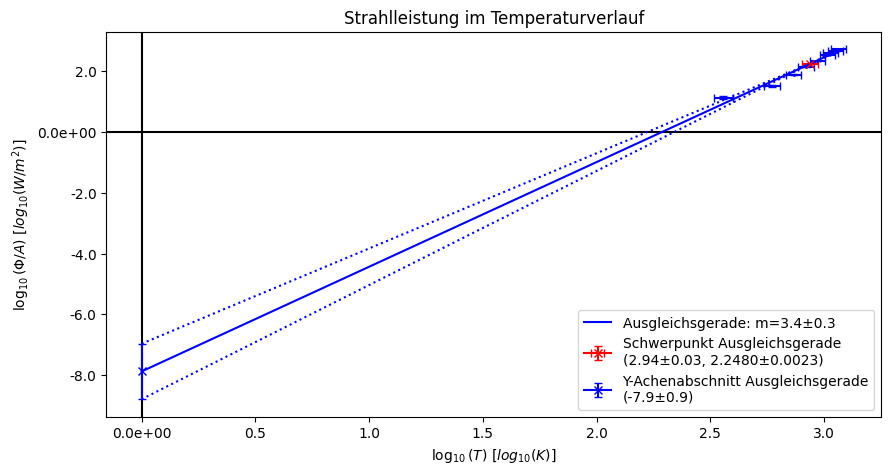

In [49]:
geraden_fit('c2_daten_rounded_zwischen_T_plot.csv', title = 'Strahlleistung im Temperaturverlauf',
             x_label = r'$\log_{10}(T) ~ [log_{10}(K)]$', y_label = r'$\log_{10}(\Phi/A) ~ [log_{10}(W/m^2)]$', 
                save = True, y_colors = ['blue'], plot_y_inter=True,
                focus_point = True, y_labels = ['Ausgleichsgerade'], plot_errors=True,
				y_axis=0, legendlocation = 'lower right'
            )

In [ ]:
runden_und_speichern('c2_daten_rounded_zwischen')
runden_und_speichern('c2_daten_rounded_zwischen_T')
runden_und_speichern('c2_daten_rounded_zwischen_T_plot')